# Session 3 — Sentence-Level Analysis
## Measure 2: Readability Scores
This notebook computes classic readability formulas for **English** such as:
- Flesch Reading Ease
- Flesch-Kincaid Grade Level

We'll analyze and compare Lewis Carroll's two Alice books:
- Alice's Adventures in Wonderland
- Through the Looking-Glass

In [1]:
import re

# Load the Alice books from Project Gutenberg
def load_book(filepath):
    """Load and clean book text from Project Gutenberg"""
    with open(filepath, 'r', encoding='utf-8') as f:
        text = f.read()
    
    # Remove Project Gutenberg headers/footers
    if 'CHAPTER I' in text:
        start = text.find('CHAPTER I')
        text = text[start:]
    elif '*** START OF' in text:
        start = text.find('*** START OF')
        text = text[start + 100:]
    
    if '*** END OF' in text:
        end = text.find('*** END OF')
        text = text[:end]
    elif 'End of Project Gutenberg' in text:
        end = text.find('End of Project Gutenberg')
        text = text[:end]
    
    return text.strip()

# Load both books
wonderland_text = load_book('../data/Wonderland.txt')
looking_glass_text = load_book('../data/Looking-Glass.txt')

print(f"Alice's Adventures in Wonderland loaded: {len(wonderland_text):,} characters")
print(f"Through the Looking-Glass loaded: {len(looking_glass_text):,} characters")

Alice's Adventures in Wonderland loaded: 144,481 characters
Through the Looking-Glass loaded: 161,373 characters


In [2]:
def count_syllables(word):
    """Simple syllable counter for English words"""
    word = word.lower()
    # Remove non-alphabetic characters
    word = re.sub(r'[^a-z]', '', word)
    if not word:
        return 1
    
    # Count vowel groups
    syllables = len(re.findall(r'[aeiouy]+', word))
    
    # Adjust for silent 'e' at the end
    if word.endswith('e') and syllables > 1:
        syllables -= 1
    
    # At least one syllable per word
    return max(1, syllables)

In [3]:
def calculate_readability(text, book_name):
    """Calculate readability scores for a given text"""
    # Split into sentences
    sentences = re.split(r'[.!?]+\s+', text.strip())
    sentences = [s.strip() for s in sentences if s.strip() and len(s.split()) > 2]
    
    # Extract words (alphabetic only)
    words = re.findall(r"[A-Za-z']+", text)
    
    # Count syllables
    syllables = sum(count_syllables(w) for w in words)
    
    num_sentences = len(sentences)
    num_words = len(words)
    
    # Flesch Reading Ease: higher score = easier to read
    # 90-100: Very Easy (5th grade)
    # 60-70: Standard (8th-9th grade)
    # 0-30: Very Difficult (college graduate)
    flesch_ease = 206.835 - 1.015 * (num_words / num_sentences) - 84.6 * (syllables / num_words)
    
    # Flesch-Kincaid Grade Level: corresponds to US grade level
    flesch_grade = 0.39 * (num_words / num_sentences) + 11.8 * (syllables / num_words) - 15.59
    
    print(f"\n{'='*70}")
    print(f"{book_name}")
    print(f"{'='*70}")
    print(f"Sentences: {num_sentences:,}")
    print(f"Words: {num_words:,}")
    print(f"Syllables: {syllables:,}")
    print(f"Avg words per sentence: {num_words/num_sentences:.2f}")
    print(f"Avg syllables per word: {syllables/num_words:.2f}")
    print(f"\nFlesch Reading Ease: {flesch_ease:.2f}")
    print(f"  Interpretation: ", end="")
    if flesch_ease >= 90:
        print("Very Easy (5th grade)")
    elif flesch_ease >= 80:
        print("Easy (6th grade)")
    elif flesch_ease >= 70:
        print("Fairly Easy (7th grade)")
    elif flesch_ease >= 60:
        print("Standard (8th-9th grade)")
    elif flesch_ease >= 50:
        print("Fairly Difficult (10th-12th grade)")
    elif flesch_ease >= 30:
        print("Difficult (College)")
    else:
        print("Very Difficult (College graduate)")
    
    print(f"\nFlesch-Kincaid Grade Level: {flesch_grade:.2f}")
    print(f"  Interpretation: Suitable for grade {flesch_grade:.0f} and above")
    
    return flesch_ease, flesch_grade

# Calculate readability for both books
wonderland_ease, wonderland_grade = calculate_readability(wonderland_text, "Alice's Adventures in Wonderland")
looking_glass_ease, looking_glass_grade = calculate_readability(looking_glass_text, "Through the Looking-Glass")


Alice's Adventures in Wonderland
Sentences: 931
Words: 27,413
Syllables: 35,214
Avg words per sentence: 29.44
Avg syllables per word: 1.28

Flesch Reading Ease: 68.27
  Interpretation: Standard (8th-9th grade)

Flesch-Kincaid Grade Level: 11.05
  Interpretation: Suitable for grade 11 and above

Through the Looking-Glass
Sentences: 1,195
Words: 30,646
Syllables: 39,014
Avg words per sentence: 25.65
Avg syllables per word: 1.27

Flesch Reading Ease: 73.10
  Interpretation: Fairly Easy (7th grade)

Flesch-Kincaid Grade Level: 9.43
  Interpretation: Suitable for grade 9 and above


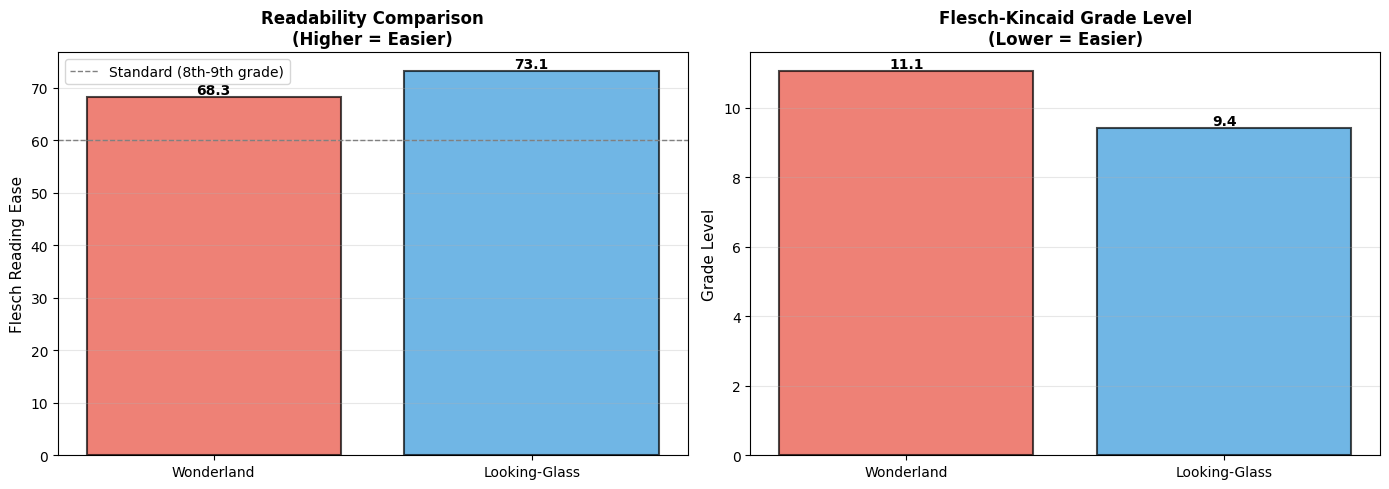


SUMMARY
Both Alice books show similar readability levels, suitable for
middle-school readers, though they are considered children's literature.
The slightly lower scores reflect Carroll's sophisticated vocabulary
and complex sentence structures.


In [4]:
# Visualize comparison
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Flesch Reading Ease comparison
ax1 = axes[0]
books = ['Wonderland', 'Looking-Glass']
ease_scores = [wonderland_ease, looking_glass_ease]
colors = ['#e74c3c', '#3498db']
bars1 = ax1.bar(books, ease_scores, color=colors, edgecolor='black', linewidth=1.5, alpha=0.7)
ax1.set_ylabel('Flesch Reading Ease', fontsize=11)
ax1.set_title('Readability Comparison\n(Higher = Easier)', fontsize=12, fontweight='bold')
ax1.axhline(y=60, color='gray', linestyle='--', linewidth=1, label='Standard (8th-9th grade)')
ax1.legend()
ax1.grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.1f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

# Flesch-Kincaid Grade Level comparison
ax2 = axes[1]
grade_scores = [wonderland_grade, looking_glass_grade]
bars2 = ax2.bar(books, grade_scores, color=colors, edgecolor='black', linewidth=1.5, alpha=0.7)
ax2.set_ylabel('Grade Level', fontsize=11)
ax2.set_title('Flesch-Kincaid Grade Level\n(Lower = Easier)', fontsize=12, fontweight='bold')
ax2.grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for bar in bars2:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.1f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

# Summary
print("\n" + "="*70)
print("SUMMARY")
print("="*70)
print("Both Alice books show similar readability levels, suitable for")
print("middle-school readers, though they are considered children's literature.")
print("The slightly lower scores reflect Carroll's sophisticated vocabulary")
print("and complex sentence structures.")